# Imports

In [13]:
# # fixed to have subjects stay within one fold

# thresh = 0
# k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
# train_rmse_scores = []
# val_rmse_scores = []
# subjects_profiles_CVsplit_LR = {}
# all_train_data = {}
# all_val_data = {}

# # Groups setup
# groups = [str(group) for group in np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed['Group'])]
# group_train_rmse = {group: [] for group in groups}
# group_val_rmse = {group: [] for group in groups}

# group_k_fold = GroupKFold(n_splits=5, shuffle=True, random_state=42)
# for fold_idx, (train_idx, val_idx) in enumerate(group_k_fold.split(X_train10, groups=X_train10['Subject'])):
#     X_fold_train, X_fold_val = X_train10.iloc[train_idx], X_train10.iloc[val_idx]
#     y_fold_train, y_fold_val = y1_train10.iloc[train_idx], y1_train10.iloc[val_idx]
    
#     print(f"\nProcessing Fold {fold_idx+1}")
    
#     # First, build the Bayesian profiles for each subject
#     for subject in np.unique(X_fold_train['Subject']):
#         profile_key = f"{subject}"
#         subjects_profiles_CVsplit_LR[profile_key] = BayesianProfile_LRcompare()
        
#         subject_data = X_fold_train[X_fold_train['Subject'] == subject]
        
#         # Group by the combination of features that define unique conditions
#         grouped = subject_data.groupby([
#             'Freq(kHz) (x1)', 'Amplitude (x3)', 'Strain (x5)',   
#             'Group'
#         ])
        
#         # Process each group (condition)
#         for group_key, group_data in grouped:
#             if group_data['Level(dB) (x2)'].min() < thresh:
#                 continue
                
#             # Get all y1 values for this condition
#             indices = group_data.index
#             y_values = y_fold_train.loc[indices]
            
#             # Extract feature values (same for all rows in group)
#             x1_val = group_data['Freq(kHz) (x1)'].iloc[0]
#             x2_val = group_data['Level(dB) (x2)'].iloc[0]
#             x3_val = group_data['Amplitude (x3)'].iloc[0]
            
#             # Add each observation with same features but different y values
#             for idx, y1_val in zip(indices, y_values):
#                 subjects_profiles_CVsplit_LR[profile_key].add_observation_y1(
#                     x1=x1_val, x2=x2_val, x3=x3_val,
#                     y1=float(y1_val),
#                 )
    
#     # Now calculate RMSE for this fold (both training and validation)
#     # Store predictions in a dictionary keyed by index
#         train_predictions = {}
        
#         for idx, row in X_fold_train.iterrows():
#             if row['Level(dB) (x2)'] >= thresh:
#                 subject = row['Subject']
#                 profile_key = f"{subject}"
#                 x1_train = row['Freq(kHz) (x1)']
#                 x2_train = row['Level(dB) (x2)']
#                 x3_train = row['Amplitude (x3)']
#             if profile_key in subjects_profiles_CVsplit_LR:
#                 pred = subjects_profiles_CVsplit_LR[profile_key].predict_y1(x1= x1_train, x2=x2_train, x3=x3_train)
#                 train_predictions[idx] = float(pred)  # Ensure it's a scalar

#         # Create pandas Series with predictions matched to proper indices
#         successful_train_indices = list(train_predictions.keys())
        
#         if successful_train_indices:
#             y_train_true = y_fold_train.loc[successful_train_indices]
#             y_train_pred = pd.Series([train_predictions[idx] for idx in successful_train_indices], 
#                                     index=successful_train_indices)
            
#             # Do the same for validation
#         val_predictions = {}
        
#         for idx, row in X_fold_val.iterrows():
#             if row['Level(dB) (x2)'] >= thresh:
#                 subject = row['Subject']
#                 profile_key = f"{subject}"
#                 x1_val = row['Freq(kHz) (x1)']
#                 x2_val = row['Level(dB) (x2)']
#                 x3_val = row['Amplitude (x3)']
#             if profile_key in subjects_profiles_CVsplit_LR:
#                 pred = subjects_profiles_CVsplit_LR[profile_key].predict_y1(x1= x1_val, x2=x2_val, x3=x3_val)
#                 val_predictions[idx] = float(pred)  # Ensure it's a scalar

        
#         # Create properly indexed validation predictions
#         successful_val_indices = list(val_predictions.keys())
        
#         if successful_val_indices:
#             y_val_true = y_fold_val.loc[successful_val_indices]
#             y_val_pred = pd.Series([val_predictions[idx] for idx in successful_val_indices], 
#                                 index=successful_val_indices)
            
#             # Print basic information
#             print(f"Train: {len(successful_train_indices)} successful predictions out of {len(X_fold_train)}")
#             print(f"Validation: {len(successful_val_indices)} successful predictions out of {len(X_fold_val)}")
            
#             # Calculate RMSE
#             true_name = f'{fold_idx} - train - true'
#             pred_name = f'{fold_idx} - train - pred'
#             all_train_data[true_name] = y_train_true
#             all_train_data[pred_name] = y_train_pred

#             fold_train_rmse = np.sqrt(np.mean((y_train_true - y_train_pred)**2))
#             train_rmse_scores.append(fold_train_rmse)
            
#             true_name = f'{fold_idx} - val - true'
#             pred_name = f'{fold_idx} - val - pred'
#             all_val_data[true_name] = y_val_true
#             all_val_data[pred_name] = y_val_pred

#             fold_val_rmse = np.sqrt(np.mean((y_val_true - y_val_pred)**2))
#             val_rmse_scores.append(fold_val_rmse)
            
#             print(f"Fold {fold_idx+1}: Train RMSE = {fold_train_rmse:.4f}, Validation RMSE = {fold_val_rmse:.4f}")
                
#                 # Calculate group-specific RMSE
#     for group in groups:
#         # Get the subject groups
#         train_subjects_df = final_clean_strained_grouped_pos_cleangroup_vs_timed.loc[successful_train_indices]
#         val_subjects_df = final_clean_strained_grouped_pos_cleangroup_vs_timed.loc[successful_val_indices]
        
#         # Filter for successful predictions for this group
#         group_train_mask = train_subjects_df['Group'] == group
#         if group_train_mask.any():
#             group_indices = group_train_mask.index[group_train_mask]
#             group_rmse = np.sqrt(np.mean((y_train_true.loc[group_indices] - y_train_pred.loc[group_indices])**2))
#             group_train_rmse[group].append(group_rmse)
        
#         group_val_mask = val_subjects_df['Group'] == group
#         if group_val_mask.any():
#             group_indices = group_val_mask.index[group_val_mask]
#             group_rmse = np.sqrt(np.mean((y_val_true.loc[group_indices] - y_val_pred.loc[group_indices])**2))
#             group_val_rmse[group].append(group_rmse)
#     else:
#         print(f"Fold {fold_idx+1}: No successful training predictions")

# # Calculate average RMSE across all folds
# if train_rmse_scores:
#     avg_train_rmse = np.mean(train_rmse_scores)
#     std_train_rmse = np.std(train_rmse_scores)
#     print(f"\nAverage Train RMSE across folds: {avg_train_rmse:.4f} ± {std_train_rmse:.4f}")

# if val_rmse_scores:
#     avg_val_rmse = np.mean(val_rmse_scores)
#     std_val_rmse = np.std(val_rmse_scores)
#     print(f"Average Validation RMSE across folds: {avg_val_rmse:.4f} ± {std_val_rmse:.4f}")

# # Calculate group-specific RMSE 
# print("\nGroup-specific RMSE:")
# print("Group | Train RMSE (Mean ± Std) | Validation RMSE (Mean ± Std)")
# print("----- | ----------------------- | -----------------------------")
# for group in groups:
#     train_values = group_train_rmse[group]
#     val_values = group_val_rmse[group]
    
#     if train_values:
#         train_mean = np.mean(train_values)
#         train_std = np.std(train_values)
#         train_str = f"{train_mean:.6f} ± {train_std:.6f}"
#     else:
#         train_str = "N/A"
        
#     if val_values:
#         val_mean = np.mean(val_values)
#         val_std = np.std(val_values)
#         val_str = f"{val_mean:.6f} ± {val_std:.6f}"
#     else:
#         val_str = "N/A"
        
#     print(f"{group:15s} | {train_str:25s} | {val_str:25s}")

# # Visualization of group-specific RMSE
# if any(group_train_rmse[group] for group in groups) and any(group_val_rmse[group] for group in groups):
#     # Prepare data for plotting
#     plot_groups = []
#     plot_train_rmse = []
#     plot_val_rmse = []
#     plot_train_std = []
#     plot_val_std = []
    
#     for group in groups:
#         if group_train_rmse[group] and group_val_rmse[group]:
#             plot_groups.append(group)
#             plot_train_rmse.append(np.mean(group_train_rmse[group]))
#             plot_val_rmse.append(np.mean(group_val_rmse[group]))
#             plot_train_std.append(np.std(group_train_rmse[group]))
#             plot_val_std.append(np.std(group_val_rmse[group]))
    
#     # Create plot if we have data
#     if plot_groups:
#         plt.figure(figsize=(14, 7))
#         x = np.arange(len(plot_groups))
#         width = 0.35
        
#         plt.bar(x - width/2, plot_train_rmse, width, yerr=plot_train_std, 
#                 label='Train RMSE', color='blue', alpha=0.7, capsize=5)
#         plt.bar(x + width/2, plot_val_rmse, width, yerr=plot_val_std,
#                 label='Validation RMSE', color='red', alpha=0.7, capsize=5)
        
#         plt.xlabel('Group')
#         plt.ylabel('RMSE')
#         plt.ylim((0,5))
#         plt.title('Bayesian Model Performance by Group (Mean ± Std)')
#         plt.xticks(x, plot_groups, rotation=90)
#         plt.legend()
#         plt.grid(True, axis='y', alpha=0.3)
#         plt.tight_layout()
#         plt.show()

# groups_list = []
# train_mean_list = []
# train_std_list = []
# val_mean_list = []
# val_std_list = []

# # Extract values for each group
# for group in sorted(group_train_rmse.keys()):
#     train_values = group_train_rmse[group]
#     val_values = group_val_rmse[group]
    
#     groups_list.append(group)
    
#     if train_values:
#         train_mean_list.append(np.mean(train_values))
#         train_std_list.append(np.std(train_values))
#     else:
#         train_mean_list.append(np.nan)
#         train_std_list.append(np.nan)
        
#     if val_values:
#         val_mean_list.append(np.mean(val_values))
#         val_std_list.append(np.std(val_values))
#     else:
#         val_mean_list.append(np.nan)
#         val_std_list.append(np.nan)


# # Create lists to store the data
# groups_list = []
# train_mean_list = []
# train_std_list = []
# val_mean_list = []
# val_std_list = []

# # Extract values for each group
# for group in sorted(group_train_rmse.keys()):
#     train_values = group_train_rmse[group]
#     val_values = group_val_rmse[group]
    
#     groups_list.append(group)
    
#     if train_values:
#         train_mean_list.append(np.mean(train_values))
#         train_std_list.append(np.std(train_values))
#     else:
#         train_mean_list.append(np.nan)
#         train_std_list.append(np.nan)
        
#     if val_values:
#         val_mean_list.append(np.mean(val_values))
#         val_std_list.append(np.std(val_values))
#     else:
#         val_mean_list.append(np.nan)
#         val_std_list.append(np.nan)

# group_metrics_df = pd.DataFrame({
#     'Group': groups_list,
#     'Train_RMSE_Mean': train_mean_list,
#     'Val_RMSE_Mean': val_mean_list,
#     'Train_RMSE_Std': train_std_list,
#     'Val_RMSE_Std': val_std_list
# })

# group_metrics_df

In [1]:
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, GroupKFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.distributed
import pandas as pd
import numpy as np
from ABRA_35 import interpolate_and_smooth, CNN, plot_wave, calculate_and_plot_wave, plot_waves_single_frequency, arfread, get_str, calculate_hearing_threshold, all_thresholds, peak_finding
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
warnings.filterwarnings('ignore')
import os
import io
import re
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GroupShuffleSplit
import os
import struct
import datetime
# from skfda import FDataGrid
# from skfda.preprocessing.dim_reduction import FPCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt
import torch
from scipy.ndimage import gaussian_filter1d
import torch.nn as nn
import splitfolders
from tensorflow.keras.models import load_model
from scipy.interpolate import CubicSpline
from scipy.signal import find_peaks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
import torch
from PIL import Image
from torchvision.transforms import ToTensor
import random
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np4
from sklearn.metrics import r2_score
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score

2025-04-14 10:57:05.149 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 10:57:05.439 
  command:

    streamlit run /opt/anaconda3/envs/new_manorimagepred/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-14 10:57:05.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 10:57:05.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 10:57:05.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 10:57:05.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 10:57:05.441 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-14 10:57:05.442

# Data Processing

In [2]:
filter1 = 128
filter2 = 32
dropout1 = 0.5
dropout2 = 0.3
dropout_fc = 0.1

# Model initialization
peak_finding_model = CNN(filter1, filter2, dropout1, dropout2, dropout_fc)
model_loader = torch.load('./models/waveI_cnn.pth')
peak_finding_model.load_state_dict(model_loader)
peak_finding_model.eval()

CNN(
  (conv1): Conv1d(1, 128, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(128, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=1952, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (dropout_fc): Dropout(p=0.1, inplace=False)
  (batch_norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [3]:
def peak_finding(wave):
    # Prepare waveform
    waveform=interpolate_and_smooth(wave) # Added indexing per calculate and plot wave function
    # waveform_torch = torch.tensor(waveform, dtype=torch.float32).unsqueeze(0) archived ABRA
    waveform_torch = torch.tensor(waveform, dtype=torch.float32).unsqueeze(0).unsqueeze(0) #newer ABRA
    # print(waveform_torch)
    # Get prediction from model
    outputs = peak_finding_model(waveform_torch)
    prediction = int(round(outputs.detach().numpy()[0][0], 0))
    # prediction_test = int(round(outputs.detach().numpy()[0], 0))
    # print("Model output:", outputs, "Prediction true start:", prediction)

    # Apply Gaussian smoothing
    smoothed_waveform = gaussian_filter1d(waveform, sigma=1)

    # Find peaks and troughs
    n = 18
    t = 14
    # start_point = prediction - 9 archived ABRA
    start_point = prediction - 6 #newer ABRA
    smoothed_peaks, _ = find_peaks(smoothed_waveform[start_point:], distance=n)
    smoothed_troughs, _ = find_peaks(-smoothed_waveform, distance=t)
    sorted_indices = np.argsort(smoothed_waveform[smoothed_peaks+start_point])
    highest_smoothed_peaks = np.sort(smoothed_peaks[sorted_indices[-5:]] + start_point)
    relevant_troughs = np.array([])
    for p in range(len(highest_smoothed_peaks)):
        c = 0
        for t in smoothed_troughs:
            if t > highest_smoothed_peaks[p]:
                if p != 4:
                    try:
                        if t < highest_smoothed_peaks[p+1]:
                            relevant_troughs = np.append(relevant_troughs, int(t))
                            break
                    except IndexError:
                        pass
                else:
                    relevant_troughs = np.append(relevant_troughs, int(t))
                    break
    relevant_troughs = relevant_troughs.astype('i')
    return highest_smoothed_peaks, relevant_troughs

def extract_metadata(metadata_lines):
    # Dictionary to store extracted metadata
    metadata = {}
    
    for line in metadata_lines:
        # Extract SW FREQ
        freq_match = re.search(r'SW FREQ:\s*(\d+\.?\d*)', line)
        if freq_match:
            metadata['SW_FREQ'] = float(freq_match.group(1))
        
        # Extract LEVELS
        levels_match = re.search(r':LEVELS:\s*([^:]+)', line)
        if levels_match:
            # Split levels and convert to list of floats
            metadata['LEVELS'] = [float(level) for level in levels_match.group(1).split(';') if level]
    
    return metadata

def read_custom_tsv(file_path):
    # Read the entire file
    with open(file_path, 'r', encoding='ISO-8859-1') as f:
        content = f.read()
    
    # Split the content into metadata and data sections
    metadata_lines = []
    data_section = None
    
    # Find the ':DATA' marker
    data_start = content.find(':DATA')
    
    if data_start != -1:
        # Extract metadata (lines before ':DATA')
        metadata_lines = content[:data_start].split('\n')
        
        # Extract data section
        data_section = content[data_start:].split(':DATA')[1].strip()
    
    # Extract specific metadata
    metadata = extract_metadata(metadata_lines)
    
    # Read the data section directly
    try:
        # Use StringIO to create a file-like object from the data section
        raw_data = pd.read_csv(
            io.StringIO(data_section), 
            sep='\s+',  # Use whitespace as separator
            header=None
        )
        raw_data = raw_data.T
        # Add metadata columns to the DataFrame
        if 'SW_FREQ' in metadata:
            raw_data['Freq(kHz)'] = metadata['SW_FREQ']
            # raw_data['Freq(Hz)'] = raw_data['Freq(Hz)'].apply(lambda x: x*1000)
        
        if 'LEVELS' in metadata:
            # Repeat levels to match the number of rows
            levels_repeated = metadata['LEVELS'] * (len(raw_data) // len(metadata['LEVELS']) + 1)
            raw_data['Level(dB)'] = levels_repeated[:len(raw_data)]
        
        filtered_data = raw_data.apply(pd.to_numeric, errors='coerce').dropna()
        filtered_data.columns = filtered_data.columns.map(str)

        columns = ['Freq(kHz)'] + ['Level(dB)'] + [col for col in filtered_data.columns if col.isnumeric() == True]
        filtered_data = filtered_data[columns]
        return filtered_data
    
    except Exception as e:
        print(f"Error reading data: {e}")
        return None, metadata

In [4]:
def peaks_troughs_amp_final(df, freq, db, time_scale=10, multiply_y_factor=1.0, units='Microvolts'):
    db_column = 'Level(dB)'
    
    khz = df[(df['Freq(kHz)'] == freq) & (df[db_column] == db)]
    if not khz.empty:
        index = khz.index.values[0]
        final = df.loc[index, '0':].dropna()
        final = pd.to_numeric(final, errors='coerce').dropna()

        target = int(244 * (time_scale / 10))
        
        # Process the wave as in calculate_and_plot_wave
        y_values = interpolate_and_smooth(final, target)
        
        # Apply scaling factor
        y_values *= multiply_y_factor
        
        # Handle units conversion if needed
        if units == 'Nanovolts':
            y_values /= 1000
            
        # Generate normalized version for peak finding
        y_values_fpf = interpolate_and_smooth(y_values[:244])
        
        # Standardize and normalize for peak finding, exactly as in the original
        flattened_data = y_values_fpf.flatten().reshape(-1, 1)
        scaler = StandardScaler()
        standardized_data = scaler.fit_transform(flattened_data)
        min_max_scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = min_max_scaler.fit_transform(standardized_data).reshape(y_values_fpf.shape)
        y_values_fpf = interpolate_and_smooth(scaled_data[:244])
        
        # Find peaks using the normalized data
        highest_peaks, relevant_troughs = peak_finding(y_values_fpf)
        
        # Calculate amplitude on the processed but non-normalized data
        if highest_peaks.size > 0 and relevant_troughs.size > 0:
            # Following the same approach as in the display_metrics_table function
            first_peak_amplitude = y_values[highest_peaks[0]] - y_values[relevant_troughs[0]]
            return highest_peaks, relevant_troughs, first_peak_amplitude
    
    return None, None, None

In [5]:
# del int
time_scale = 18
amp_per_freq = {'Subject': [], 'Freq(kHz) (x1)': [], 'Level(dB) (x2)': [], 'Amplitude (x3)':[]}
start_path = '/Users/leahashebir/Downloads/Manor_Practicum/liberman_data/abr_data/WPZ Electrophysiology'
for subject in os.listdir(start_path):
    # print("Subject:",subject)
    for fq in os.listdir(os.path.join(start_path,subject)):
        # print(fq)
        if fq.startswith('ABR') and fq.endswith('.tsv'):
            path = os.path.join(start_path,subject,fq)
            data_df = read_custom_tsv(path)
            # print(data_df)
            freqs = data_df['Freq(kHz)'].unique().tolist()
            levels = data_df['Level(dB)'].unique().tolist()
            for freq in freqs:
                for lvl in levels:
                    # print("Frequency=",freq, "Level=", lvl)
                    _, _, amp = peaks_troughs_amp_final(df=data_df, freq=freq, db=lvl, time_scale=time_scale)
                    # print(f'Amplitude: {amp}\n')
                    amp_per_freq['Subject'].append(subject)
                    amp_per_freq['Freq(kHz) (x1)'].append(freq)
                    amp_per_freq['Level(dB) (x2)'].append(lvl)
                    amp_per_freq['Amplitude (x3)'].append(amp)
        else:
            pass


amp_df_full = pd.DataFrame(data=amp_per_freq)

raw_synapse_counts = pd.read_excel('/Users/leahashebir/Downloads/Manor_Practicum/liberman_data/WPZ Ribbon and Synapse Counts.xlsx')
raw_synapse_counts = raw_synapse_counts.mask(lambda x: x.isnull()).dropna()
raw_synapse_counts['Synapses to IHC (y1)'] = raw_synapse_counts.iloc[:,6]
raw_synapse_counts['vx (x4)'] = raw_synapse_counts['vx']
raw_synapse_counts.drop(columns=['vx'], inplace=True)
raw_synapse_counts.rename(columns={'Freq':'Freq(kHz) (x1)'}, inplace=True)
# raw_synapse_counts['Freq(Hz) (x1)'] = raw_synapse_counts['Freq(Hz) (x1)'].apply(lambda x: x*1000) # PUTTING BACK
raw_synapse_counts.rename(columns={'Case':'Subject'}, inplace=True)

In [6]:
# Version 1 - values per vx

paired = amp_df_full.join(raw_synapse_counts.set_index(['Subject', 'Freq(kHz) (x1)']), on=['Subject', 'Freq(kHz) (x1)'])
# slice = paired[paired['Subject']=='WPZ174'][['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)','Synapses to IHC (y1)', 'IHCs (y2)']]
final = paired[['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)','Synapses to IHC (y1)', 'IHCs']]
final_clean = final.dropna()

# adding in the strain feature
strains = pd.read_excel('/Users/leahashebir/Downloads/Manor_Practicum/liberman_data/WPZ Mouse groups.xlsx')
final_clean_strained = final_clean.join(strains.set_index('ID#'), on='Subject')
final_clean_strained['Strain'] = final_clean_strained['Strain'].str.strip()
final_clean_strained = final_clean_strained.rename(columns={'Strain': 'Strain (x5)'})
final_clean_strained = final_clean_strained.dropna()
final_clean_strained = final_clean_strained[['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)', 'Strain (x5)', 'Synapses to IHC (y1)', 'Group']]

final_clean_strained_grouped = final_clean_strained.copy()
final_clean_strained_grouped['Group - dB'] = final_clean_strained_grouped['Group'].apply(lambda x: x.split(' ')[0] if x.split(' ')[0].endswith('dB') else 'Control')
final_clean_strained_grouped['Group - Time Elapsed'] = final_clean_strained_grouped['Group'].apply(lambda x: x.split(' ')[1] if x.split(' ')[1].endswith(('h', 'wks', 'w')) else x.split(' ')[0])
final_clean_strained_grouped.head()

final_clean_strained_grouped_pos = final_clean_strained_grouped.copy()
final_clean_strained_grouped_pos['Amplitude (x3)'] = final_clean_strained_grouped['Amplitude (x3)'].apply(lambda x: 0 if x < 0 else x)

final_clean_strained_grouped_pos_cleangroup = final_clean_strained_grouped_pos.copy()
final_clean_strained_grouped_pos_cleangroup['Group'] = final_clean_strained_grouped_pos_cleangroup['Group'].apply(lambda x: x.strip())

final_clean_strained_grouped_pos_cleangroup.head()
final_clean_strained_grouped_pos_cleangroup_vs = final_clean_strained_grouped_pos_cleangroup.copy()
final_clean_strained_grouped_pos_cleangroup_vs['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs['Group - dB']
# final_clean_strained_grouped_pos_cleangroup_vs['Group - Time Elapsed (x7)'] = final_clean_strained_grouped_pos_cleangroup_vs['Group - Time Elapsed']
final_clean_strained_grouped_pos_cleangroup_vs = final_clean_strained_grouped_pos_cleangroup_vs[['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)',
       'vx (x4)', 'Strain (x5)','Group - dB (x6)', 'Group - Time Elapsed', 'Group','Synapses to IHC (y1)']]

def split_on_number(input_string):
    return re.findall(r"[A-Za-z]+|\d+", input_string)

hrs_week = 24*7

final_clean_strained_grouped_pos_cleangroup_vs_timed = final_clean_strained_grouped_pos_cleangroup_vs.copy()
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'].apply(lambda x: '0dB' if x == 'Control' else x)
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'].apply(split_on_number)
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'].apply(lambda x: x[0])
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - dB (x6)'].apply(lambda x: int(x.strip()))
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Split'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed'].apply(split_on_number)
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Magn.'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Split'].apply(lambda x: x[0])
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Magn.'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Magn.'].apply(lambda x: int(x.strip()))
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Unit'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Split'].apply(lambda x: x[1])
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Unit'] = final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Time Elapsed - Unit'].apply(lambda x: "wks" if x == 'w' else x)
final_clean_strained_grouped_pos_cleangroup_vs_timed['Group - Hours Elapsed (x7)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed.apply(lambda row: row['Group - Time Elapsed - Magn.']* hrs_week if row['Group - Time Elapsed - Unit'] == 'wks' else row['Group - Time Elapsed - Magn.'], axis = 1)

In [7]:
# Version 2 - Averaged per Vx

paired2 = amp_df_full.join(raw_synapse_counts.set_index(['Subject', 'Freq(kHz) (x1)']), on=['Subject', 'Freq(kHz) (x1)'])
# lilslice = paired[paired['Subject']=='WPZ174'][['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)','Synapses to IHC (y1)', 'IHCs']]
final2 = paired2[['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)','Synapses to IHC (y1)', 'Synapses', 'IHCs']]
final_clean2 = final2.dropna()

# adding in the strain feature
strains = pd.read_excel('/Users/leahashebir/Downloads/Manor_Practicum/liberman_data/WPZ Mouse groups.xlsx')
final_clean_strained2 = final_clean2.join(strains.set_index('ID#'), on='Subject')
final_clean_strained2['Strain'] = final_clean_strained2['Strain'].str.strip()
final_clean_strained2 = final_clean_strained2.rename(columns={'Strain': 'Strain (x5)'})
final_clean_strained2 = final_clean_strained2.dropna()
final_clean_strained2 = final_clean_strained2[['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)', 'Strain (x5)', 'Synapses to IHC (y1)', 'Group', 'Synapses', 'IHCs']]
# np.unique(final_clean_strained2['Group'])

# final_clean_70 = final_clean[final_clean['Level(dB) (x2)'] >= 70.0]
# final_clean_strained_70 = final_clean_strained[final_clean_strained['Level(dB) (x2)'] >= 70.0]
# # np.unique(final_clean['Level(dB) (x2)']) max level is 80 db
# len(final_clean), len(final_clean_70) # 10000 less data points!!!

final_clean_strained_grouped2 = final_clean_strained2.copy()
final_clean_strained_grouped2['Group - dB'] = final_clean_strained_grouped2['Group'].apply(lambda x: x.split(' ')[0] if x.split(' ')[0].endswith('dB') else 'Control')
final_clean_strained_grouped2['Group - Time Elapsed'] = final_clean_strained_grouped2['Group'].apply(lambda x: x.split(' ')[1] if x.split(' ')[1].endswith(('h', 'wks', 'w')) else x.split(' ')[0])
final_clean_strained_grouped2.head()

final_clean_strained_grouped_pos2 = final_clean_strained_grouped2.copy()
final_clean_strained_grouped_pos2['Amplitude (x3)'] = final_clean_strained_grouped2['Amplitude (x3)'].apply(lambda x: 0 if x < 0 else x)

len(final_clean_strained_grouped_pos2[final_clean_strained_grouped_pos2['Amplitude (x3)'] < 0])

final_clean_strained_grouped_pos2['Amplitude (x3)'] = final_clean_strained_grouped2['Amplitude (x3)'].apply(lambda x: 0 if x < 0 else x)

# final_clean_strained_grouped_pos[(final_clean_strained_grouped_pos['Subject'] == 'WPZ66') & (final_clean_strained_grouped_pos['Amplitude (x3)'] ==0.055901451434921576)
final_clean_strained_grouped_pos_cleangroup2 = final_clean_strained_grouped_pos2.copy()
final_clean_strained_grouped_pos_cleangroup2['Group'] = final_clean_strained_grouped_pos_cleangroup2['Group'].apply(lambda x: x.strip())
np.unique(final_clean_strained_grouped_pos_cleangroup2['Group'])

final_clean_strained_grouped_pos_cleangroup2.head()
final_clean_strained_grouped_pos_cleangroup_vs2 = final_clean_strained_grouped_pos_cleangroup2.copy()
final_clean_strained_grouped_pos_cleangroup_vs2['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs2['Group - dB']
# final_clean_strained_grouped_pos_cleangroup_vs['Group - Time Elapsed (x7)'] = final_clean_strained_grouped_pos_cleangroup_vs['Group - Time Elapsed']
final_clean_strained_grouped_pos_cleangroup_vs2 = final_clean_strained_grouped_pos_cleangroup_vs2[['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)',
       'vx (x4)', 'Strain (x5)','Group - dB (x6)', 'Group - Time Elapsed', 'Group','Synapses to IHC (y1)', 'Synapses', 'IHCs']]

def split_on_number(input_string):
    return re.findall(r"[A-Za-z]+|\d+", input_string)

hrs_week = 24*7

final_clean_strained_grouped_pos_cleangroup_vs_timed2 = final_clean_strained_grouped_pos_cleangroup_vs2.copy()
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'].apply(lambda x: '0dB' if x == 'Control' else x)
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'].apply(split_on_number)
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'].apply(lambda x: x[0])
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - dB (x6)'].apply(lambda x: int(x.strip()))
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Split'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed'].apply(split_on_number)
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Magn.'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Split'].apply(lambda x: x[0])
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Magn.'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Magn.'].apply(lambda x: int(x.strip()))
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Unit'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Split'].apply(lambda x: x[1])
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Unit'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Time Elapsed - Unit'].apply(lambda x: "wks" if x == 'w' else x)
final_clean_strained_grouped_pos_cleangroup_vs_timed2['Group - Hours Elapsed (x7)'] = final_clean_strained_grouped_pos_cleangroup_vs_timed2.apply(lambda row: row['Group - Time Elapsed - Magn.']* hrs_week if row['Group - Time Elapsed - Unit'] == 'wks' else row['Group - Time Elapsed - Magn.'], axis = 1)
final_clean_strained_grouped_pos_cleangroup_vs_timed2

freqs = np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed2['Freq(kHz) (x1)'])
subs = np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed2['Subject'])
final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx = final_clean_strained_grouped_pos_cleangroup_vs_timed2.copy()
for freq in freqs:
    for sub in subs:
        mask = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx[(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Freq(kHz) (x1)'] == freq) & (final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Subject'] == sub)] # global for updates
        if len(mask) > 0:

            mask1 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx[(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Freq(kHz) (x1)'] == freq) & (final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Subject'] == sub) & (final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['vx (x4)'] == 'v1')]
            mask2 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx[(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Freq(kHz) (x1)'] == freq) & (final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Subject'] == sub) & (final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['vx (x4)'] == 'v2')]

            if not mask1.empty and not mask2.empty:
                mask1 = mask1.reset_index().iloc[0,:]
                mask2 = mask2.reset_index().iloc[0,:]

                total_syns = float(mask1['Synapses'] + mask2['Synapses'])
                total_ihcs = float(mask1['IHCs'] + mask2['IHCs'])
                ratio = total_syns / total_ihcs
                # print(total_syns, total_ihcs)
                # if total_syns == 0.0 or total_ihcs == 0.0:
                #     print(sub, freq)
                mask_index = mask.index
                final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[mask_index,'Synapse to IHC Ratio per Freq (y2)'] = ratio

final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Synapse to IHC Ratio per Freq (y2)']

0        9.831461
0        9.831461
1        9.831461
1        9.831461
2        9.831461
          ...    
7328    16.170213
7329    16.170213
7329    16.170213
7330    16.170213
7330    16.170213
Name: Synapse to IHC Ratio per Freq (y2), Length: 12187, dtype: float64

# Bayesian Model Comparison

## Model

In [8]:
class BayesianProfile_LRcompare:
    def __init__(self, training_data=None, prior_mean_y1=None, prior_cov_y1=None):
        """
        Initialize a Bayesian profile with static scaling
        
        Parameters:
        training_data: DataFrame with initial data to fit scalers
        prior_mean: Initial guess for parameters (default: zeros)
        prior_cov: Initial uncertainty in parameters (default: identity matrix)
        """
        # For 48 parameters: intercept, x1, x3, interaction
        self.n_params = 4
        
        # Initialize priors
        if prior_mean_y1 is None:
            self.mean_y1 = np.zeros(self.n_params)
        else:
            self.mean_y1 = prior_mean_y1
            
        if prior_cov_y1 is None:
            self.cov_y1 = np.eye(self.n_params) * 10  # Start with high uncertainty
        else:
            self.cov_y1 = prior_cov_y1

        # Keep track of all data points
        self.X_history = []
        self.y1_history = []
        
        # For tracking prediction performance
        self.rmse_history_y1 = []
        
        # Initialize scalers
        self.x1_scaler = StandardScaler()
        self.x3_scaler = StandardScaler()
        
        # Initialize scaling flag
        self.scaling_applied = False
        
        # Fit scalers if training data is provided
        if training_data is not None:
            self._initialize_scalers(training_data)

    def _initialize_scalers(self, data):
        """
        Initialize scalers with training data
        """
        if 'Freq(kHz) (x1)' in data.columns and 'Amplitude (x3)' in data.columns:
            # Fit scalers to all training data once
            self.x1_scaler.fit(data['Freq(kHz) (x1)'].values.reshape(-1,1))
            self.x3_scaler.fit(data['Amplitude (x3)'].values.reshape(-1, 1))
            self.scaling_applied = True
            print(f"Scalers initialized with {len(data)} records")
        else:
            print("Warning: Training data missing required columns for scaling")

    def _scale_x1(self, x1):
        """
        Scale x3 using the fitted scaler
        """
        if not self.scaling_applied:
            return x1  # Return as is if scaler not fit
        
        x1_array = np.array([float(x1)]).reshape(-1, 1)
        return self.x1_scaler.transform(x1_array)[0][0]

    def _scale_x3(self, x3):
        """
        Scale x3 using the fitted scaler
        """
        if not self.scaling_applied:
            return x3
        
        x3_array = np.array([float(x3)]).reshape(-1, 1)
        return self.x3_scaler.transform(x3_array)[0][0]
        
    def add_observation_y1(self, x1, x3, y1, noise_var=1.0, prior_mean_y1=None, prior_cov_y1=None):
        """
        Update the profile with a new observation using static scaling
        """
        self.raw_x1 = float(x1)
        self.raw_x3 = float(x3)
        self.raw_y1 = float(y1)
        
        x1_scaled = self._scale_x1(x1)
        x3_scaled = self._scale_x3(x3)
        
        # Reshape for processing
        x1_scaled = np.asarray(x1_scaled).reshape(1, -1)
        x3_scaled = np.asarray(x3_scaled).reshape(1, -1)
        
        arrays_to_stack = [
            np.ones(1).reshape(1, -1),        
            x1_scaled,
            x3_scaled,
            (x1_scaled.T @ x3_scaled).reshape(1,-1)                                  
        ]

        X = np.hstack(arrays_to_stack)
        self.X_history.append(X[0])
        self.y1_history.append(float(y1))
        
        # Numerical stability in matrix inversion
        try:
            # regularization for numerical stability
            K = self.cov_y1 @ X.T @ np.linalg.inv(X @ self.cov_y1 @ X.T + noise_var + 1e-8 * np.eye(X.shape[0]))
            
            innovation = y1 - float(X @ self.mean_y1)
            self.mean_y1 = self.mean_y1 + (K.flatten() * innovation) # our coefficients/parameters!
            self.cov_y1 = self.cov_y1 - (K @ X @ self.cov_y1) # prep for our next set of observations
        except np.linalg.LinAlgError as e:
            print(f"Matrix inversion error: {e}")
            return
        
        try:
            predictions = []
            for i, x_hist in enumerate(self.X_history):
                # Extract features from history
                hist_x1 = x_hist[1]
                hist_x3 = x_hist[2]
                    
                try:
                    # print(f"self.mean_y1: {self.mean_y1}, self.cov_y1 shape: {self.cov_y1.shape}")
                    # print(f"Trying to predict with x1={hist_x1}, x3={hist_x3}")
                    pred = self.predict_y1(x1=hist_x1, x3=hist_x3)
                    # print(pred)
                    if pred is not None and np.isfinite(pred):
                        predictions.append(pred)
                except Exception as e:
                    print(f"Error in !prediction! for RMSE: {e}")
                    predictions.append(self.y1_history[i])
                    
            if predictions:
                rmse = np.sqrt(np.mean((np.array(self.y1_history) - np.array(predictions))**2))
                if np.isfinite(rmse):
                    self.rmse_history_y1.append(rmse)
                else:
                    # If we got an invalid RMSE, append the last valid one or 0
                    if self.rmse_history_y1:
                        self.rmse_history_y1.append(self.rmse_history_y1[-1])
                        print("Invalid RMSE!! Check here")
                    else:
                        self.rmse_history_y1.append(0.0)
        except Exception as e:
            print(f"Error !calculating! RMSE: {e}")
            # Append last RMSE or 0 if none exists
            if self.rmse_history_y1:
                self.rmse_history_y1.append(self.rmse_history_y1[-1])
            else:
                self.rmse_history_y1.append(0.0)

    def predict_y1(self, x1,x3):
        """
        Make a prediction for given input values with static scaling
        
        Parameters:
        x1, x3: Input features (will be scaled if scaling is enabled)
        x5: Categorical feature
        x6, x7: Additional input features
        
        Returns:
        float: Predicted value (in original scale)
        """
        # Apply scaling if enabled
        x1_scaled = self._scale_x1(x1)
        x3_scaled = self._scale_x3(x3)
        
        # Reshape and encode
        x1_scaled = np.asarray(x1_scaled).reshape(1, -1)
        x3_scaled = np.asarray(x3_scaled).reshape(1, -1)
        
        # Create arrays to stack with correct shapes
        arrays_to_stack = [
            np.ones(1).reshape(1, -1),        
            x1_scaled,
            x3_scaled,
            np.array(x1_scaled * x3_scaled).reshape(1, -1)                                  
        ]

        X = np.hstack(arrays_to_stack)

        raw_pred = float(X @ self.mean_y1)
        if not np.isfinite(raw_pred):
            print(f"Non-finite prediction for x1={x1_scaled},x3={x3_scaled}")
            # print(f"Model coefficients: {self.mean_y1}")
        pred = max(0, raw_pred)
        return pred

    def predict_with_uncertainty_y1(self, x1, x3):
        """
        Make a prediction with uncertainty bounds
        
        Returns:
        tuple: (prediction, standard_deviation)
        """
        # Apply scaling if enabled
        x1_scaled = self._scale_x1(x1)
        x3_scaled = self._scale_x3(x3)
        
        # Reshape and encode
        x1_scaled = np.asarray(x1_scaled).reshape(1, -1)
        x3_scaled = np.asarray(x3_scaled).reshape(1, -1)

        # Create arrays to stack with correct shapes
        arrays_to_stack = [
            np.ones(1).reshape(1, -1),        
            x1_scaled,
            x3_scaled,
            np.array(x1_scaled * x3_scaled).reshape(1, -1)                            
        ]
        
        X = np.hstack(arrays_to_stack)
        
        # Predict
        pred = float(X @ self.mean_y1)
        std = float(np.sqrt(X @ self.cov_y1 @ X.T))
        # pred_scaled = float(X @ self.mean_y1)
        # std_scaled = float(np.sqrt(X @ self.cov_y1 @ X.T))

        # if self.scaling_applied:
        #     std = std_scaled * self.y1_scaler.scale_[0]
        # else:
        #     std = std_scaled
        
        # Check for valid values
        if not np.isfinite(pred) or not np.isfinite(std):
            print(f"Warning: Non-finite prediction or std: {pred}, {std}")
            return None, None
        
        # Transform back to original scale
        # pred = self._inverse_scale_y1(pred_scaled)

        pred = float(X @ self.mean_y1)
        pred = max(0, pred)
        std = float(np.sqrt(X @ self.cov_y1 @ X.T))

        if not np.isfinite(pred) or not np.isfinite(std):
            print(f"Warning: Non-finite prediction or std: {pred}, {std}")
            return None, None
        # Convert back to original scale if scaling was applied
        return pred, std

## Older Approach - CV

In [ ]:
# Split data based on ABR recording frequencies and compare!!!!!!!
# Because it doesn't make sense to have TT by subject for this given one model is specific to a subject...
np.random.seed(43)
groups = np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Group'])
sorted_freqs = sorted(np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Freq(kHz) (x1)']))

freq_groups = {}
for i, freq in enumerate(sorted_freqs):
    # Splits up the frequencies into n groups
    group_idx = i % 3
    if group_idx not in freq_groups:
        freq_groups[group_idx] = []
    freq_groups[group_idx].append(freq)

print(freq_groups)

recs_by_group = {}
for group in final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Group'].unique():
    recs_in_group = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx[final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Group'] == group]
    recs_by_group[group] = recs_in_group

train_freqs = []
test_freqs = []

for group_idx, freqs in freq_groups.items():
    # Shuffle frequencies within this group (kinda like RF. randomly splits on which freqs to use in train/test)
    np.random.shuffle(freqs)
    
    n_test = max(1, round(len(freqs) * 0.2))  # Ensuring at least 2 frequencies are used for testing

    # Add to overall train/test sets
    test_freqs.extend(freqs[:n_test])
    train_freqs.extend(freqs[n_test:])

# train_indices = []
# test_indices = []

for group in np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Group']):
    group_recs = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx[final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Group'] == group]
    train_group_indices = group_recs[group_recs['Freq(kHz) (x1)'].isin(train_freqs)].index.tolist()
    test_group_indices = group_recs[group_recs['Freq(kHz) (x1)'].isin(test_freqs)].index.tolist()

    # test_indices.extend(test_group_indices)
    # train_indices.extend(train_group_indices)

train_indices = []
test_indices = []

for subject in np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Subject']):
    subject_recs = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx[final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx['Subject'] == subject]

    train_subject_indices = subject_recs[subject_recs['Freq(kHz) (x1)'].isin(train_freqs)].index.tolist()
    test_subject_indices = subject_recs[subject_recs['Freq(kHz) (x1)'].isin(test_freqs)].index.tolist()

    # Ensure the subject has data in both splits
    if len(train_subject_indices) == 0 or len(test_subject_indices) == 0:
        continue  # Skip this subject to avoid leakage problems

    test_indices.extend(test_subject_indices)
    train_indices.extend(train_subject_indices)


inputs = ['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'vx (x4)', 'Strain (x5)', 'Group']
X_train10 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[train_indices, inputs]
X_test10 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[test_indices, inputs]
y1_train10 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[train_indices, 'Synapses to IHC (y1)']
y1_test10 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[test_indices, 'Synapses to IHC (y1)']
y2_train10 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[train_indices, 'Synapse to IHC Ratio per Freq (y2)']
y2_test10 = final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx.loc[test_indices, 'Synapse to IHC Ratio per Freq (y2)']

{0: [8.0, 22.6], 1: [11.3, 32.0], 2: [16.0, 45.2]}



Processing Fold 1
Fold 1: No successful training predictions

Processing Fold 2
Train: 1899 successful predictions out of 9868
Validation: 657 successful predictions out of 2628
Fold 2: Train RMSE = 1.0123, Validation RMSE = 1.0472
Train: 1899 successful predictions out of 9868
Validation: 657 successful predictions out of 2628
Fold 2: Train RMSE = 1.0123, Validation RMSE = 1.0472
Train: 1899 successful predictions out of 9868
Validation: 657 successful predictions out of 2628
Fold 2: Train RMSE = 1.0123, Validation RMSE = 1.0472
Train: 1899 successful predictions out of 9868
Validation: 657 successful predictions out of 2628
Fold 2: Train RMSE = 1.0123, Validation RMSE = 1.0472
Train: 1928 successful predictions out of 9868
Validation: 657 successful predictions out of 2628
Fold 2: Train RMSE = 1.0124, Validation RMSE = 1.0472
Train: 1928 successful predictions out of 9868
Validation: 657 successful predictions out of 2628
Fold 2: Train RMSE = 1.0124, Validation RMSE = 1.0472
Train: 

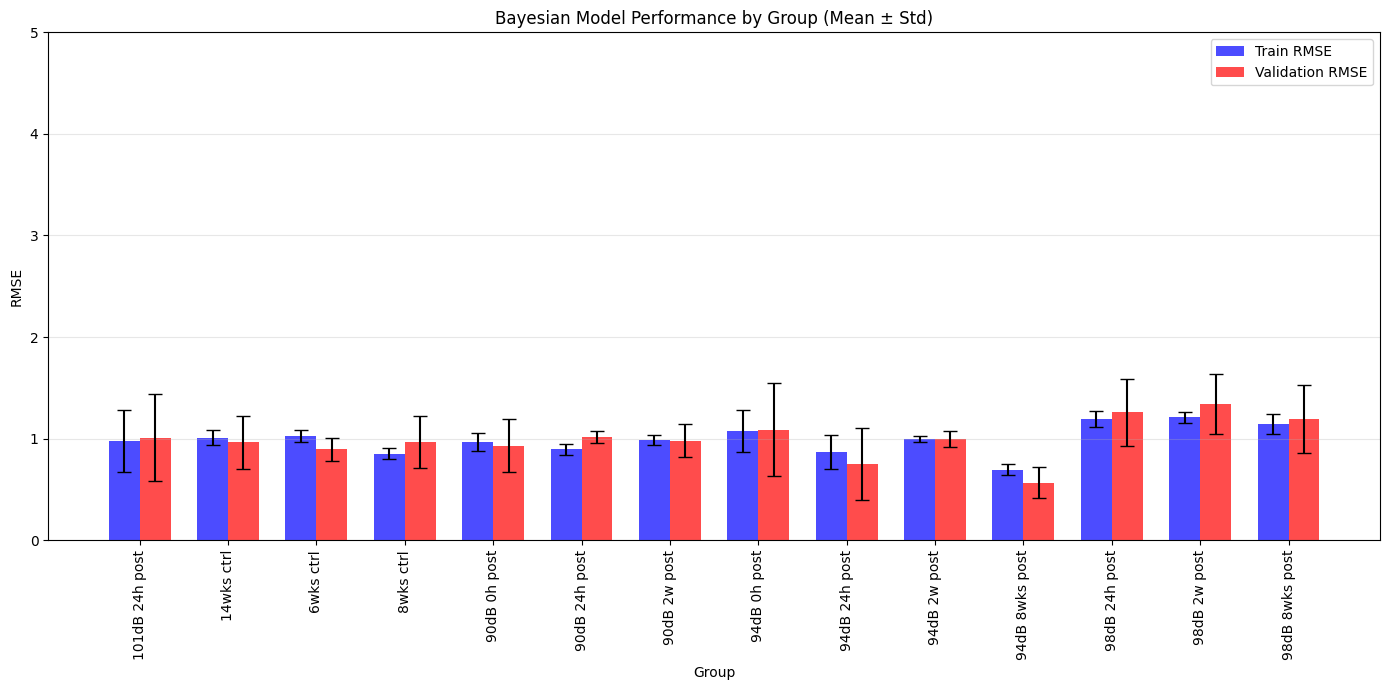

,Group,Train_RMSE_Mean,Val_RMSE_Mean,Train_RMSE_Std,Val_RMSE_Std
0,101dB 24h post,0.978406,1.010828,0.305007,0.428902
1,14wks ctrl,1.008727,0.966016,0.072967,0.261657
2,6wks ctrl,1.027716,0.894390,0.057897,0.116552
3,8wks ctrl,0.850256,0.969308,0.053936,0.257919
4,90dB 0h post,0.969269,0.932447,0.090601,0.258693
5,90dB 24h post,0.894460,1.014232,0.052467,0.060713
6,90dB 2w post,0.983162,0.980913,0.047837,0.165073
7,94dB 0h post,1.071978,1.087340,0.205128,0.458758
8,94dB 24h post,0.870703,0.749104,0.168378,0.355262
9,94dB 2w post,0.993267,0.995966,0.029321,0.077603


In [15]:
# fixed to have subjects stay within one fold

thresh = 0
# k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
train_rmse_scores = []
val_rmse_scores = []
subjects_profiles_CVsplit_LR = {}
all_train_data = {}
all_val_data = {}

groups = [str(group) for group in np.unique(final_clean_strained_grouped_pos_cleangroup_vs_timed['Group'])]
group_train_rmse = {group: [] for group in groups}
group_val_rmse = {group: [] for group in groups}

group_k_fold = GroupKFold(n_splits=5, shuffle=True, random_state=42)
for fold_idx, (train_idx, val_idx) in enumerate(group_k_fold.split(X_train10, groups=X_train10['Subject'])):
    X_fold_train, X_fold_val = X_train10.iloc[train_idx], X_train10.iloc[val_idx]
    y_fold_train, y_fold_val = y1_train10.iloc[train_idx], y1_train10.iloc[val_idx]
    print(f"\nProcessing Fold {fold_idx+1}")
    
    for subject in np.unique(X_fold_train['Subject']):
        profile_key = f"{subject}"
        subjects_profiles_CVsplit_LR[profile_key] = BayesianProfile_LRcompare()
        
        subject_data = X_fold_train[X_fold_train['Subject'] == subject]
        
        grouped = subject_data.groupby([
            'Freq(kHz) (x1)', 'Amplitude (x3)', 'Strain (x5)',   
            'Group'
        ])
        
        for group_key, group_data in grouped:
            if group_data['Level(dB) (x2)'].min() < thresh:
                continue
                
            indices = group_data.index
            y_values = y_fold_train.loc[indices]
            
            x1_val = group_data['Freq(kHz) (x1)'].iloc[0]
            x3_val = group_data['Amplitude (x3)'].iloc[0]
            
            for idx, y1_val in zip(indices, y_values):
                subjects_profiles_CVsplit_LR[profile_key].add_observation_y1(
                    x1=x1_val,x3=x3_val,
                    y1=float(y1_val),
                )
    
        train_predictions = {}
        
        for idx, row in X_fold_train.iterrows():
            if row['Level(dB) (x2)'] >= thresh:
                subject = row['Subject']
                profile_key = f"{subject}"
                x1_train = row['Freq(kHz) (x1)']
                x3_train = row['Amplitude (x3)']
            if profile_key in subjects_profiles_CVsplit_LR:
                pred = subjects_profiles_CVsplit_LR[profile_key].predict_y1(x1= x1_train, x3=x3_train)
                train_predictions[idx] = float(pred) 

        successful_train_indices = list(train_predictions.keys())
        
        if successful_train_indices:
            y_train_true = y_fold_train.loc[successful_train_indices]
            y_train_pred = pd.Series([train_predictions[idx] for idx in successful_train_indices], 
                                    index=successful_train_indices)
            
            # Do the same for validation
        val_predictions = {}
        
        for idx, row in X_fold_val.iterrows():
            if row['Level(dB) (x2)'] >= thresh:
                subject = row['Subject']
                profile_key = f"{subject}"
                x1_val = row['Freq(kHz) (x1)']
                x3_val = row['Amplitude (x3)']
            if profile_key in subjects_profiles_CVsplit_LR:
                pred = subjects_profiles_CVsplit_LR[profile_key].predict_y1(x1= x1_val, x3=x3_val)
                val_predictions[idx] = float(pred)  # Ensure it's a scalar

        
        # Create properly indexed validation predictions
            successful_val_indices = list(val_predictions.keys())
            
        if successful_val_indices:
            y_val_true = y_fold_val.loc[successful_val_indices]
            y_val_pred = pd.Series([val_predictions[idx] for idx in successful_val_indices], 
                                index=successful_val_indices)
            
            # Print basic information
            print(f"Train: {len(successful_train_indices)} successful predictions out of {len(X_fold_train)}")
            print(f"Validation: {len(successful_val_indices)} successful predictions out of {len(X_fold_val)}")
            
            # Calculate RMSE
            true_name = f'{fold_idx} - train - true'
            pred_name = f'{fold_idx} - train - pred'
            all_train_data[true_name] = y_train_true
            all_train_data[pred_name] = y_train_pred

            fold_train_rmse = np.sqrt(np.mean((y_train_true - y_train_pred)**2))
            train_rmse_scores.append(fold_train_rmse)
            
            true_name = f'{fold_idx} - val - true'
            pred_name = f'{fold_idx} - val - pred'
            all_val_data[true_name] = y_val_true
            all_val_data[pred_name] = y_val_pred

            fold_val_rmse = np.sqrt(np.mean((y_val_true - y_val_pred)**2))
            val_rmse_scores.append(fold_val_rmse)
            
            print(f"Fold {fold_idx+1}: Train RMSE = {fold_train_rmse:.4f}, Validation RMSE = {fold_val_rmse:.4f}")
                    
                    # Calculate group-specific RMSE
            for group in groups:
                # Get the subject groups
                train_subjects_df = final_clean_strained_grouped_pos_cleangroup_vs_timed.loc[successful_train_indices]
                val_subjects_df = final_clean_strained_grouped_pos_cleangroup_vs_timed.loc[successful_val_indices]
                
                # Filter for successful predictions for this group
                group_train_mask = train_subjects_df['Group'] == group
                if group_train_mask.any():
                    group_indices = group_train_mask.index[group_train_mask]
                    group_rmse = np.sqrt(np.mean((y_train_true.loc[group_indices] - y_train_pred.loc[group_indices])**2))
                    group_train_rmse[group].append(group_rmse)
                
                group_val_mask = val_subjects_df['Group'] == group
                if group_val_mask.any():
                    group_indices = group_val_mask.index[group_val_mask]
                    group_rmse = np.sqrt(np.mean((y_val_true.loc[group_indices] - y_val_pred.loc[group_indices])**2))
                    group_val_rmse[group].append(group_rmse) 
    else:
        print(f"Fold {fold_idx+1}: No successful training predictions")

# Calculate average RMSE across all folds
if train_rmse_scores:
    avg_train_rmse = np.mean(train_rmse_scores)
    std_train_rmse = np.std(train_rmse_scores)
    print(f"\nAverage Train RMSE across folds: {avg_train_rmse:.4f} ± {std_train_rmse:.4f}")

if val_rmse_scores:
    avg_val_rmse = np.mean(val_rmse_scores)
    std_val_rmse = np.std(val_rmse_scores)
    print(f"Average Validation RMSE across folds: {avg_val_rmse:.4f} ± {std_val_rmse:.4f}")

# # Calculate group-specific RMSE 
# print("\nGroup-specific RMSE:")
# print("Group | Train RMSE (Mean ± Std) | Validation RMSE (Mean ± Std)")
# print("----- | ----------------------- | -----------------------------")
# for group in groups:
#     train_values = group_train_rmse[group]
#     val_values = group_val_rmse[group]
    
#     if train_values:
#         train_mean = np.mean(train_values)
#         train_std = np.std(train_values)
#         train_str = f"{train_mean:.6f} ± {train_std:.6f}"
#     else:
#         train_str = "N/A"
        
#     if val_values:
#         val_mean = np.mean(val_values)
#         val_std = np.std(val_values)
#         val_str = f"{val_mean:.6f} ± {val_std:.6f}"
#     else:
#         val_str = "N/A"
        
#     print(f"{group:15s} | {train_str:25s} | {val_str:25s}")

# Visualization of group-specific RMSE
if any(group_train_rmse[group] for group in groups) and any(group_val_rmse[group] for group in groups):
    # Prepare data for plotting
    plot_groups = []
    plot_train_rmse = []
    plot_val_rmse = []
    plot_train_std = []
    plot_val_std = []
    
    for group in groups:
        if group_train_rmse[group] and group_val_rmse[group]:
            plot_groups.append(group)
            plot_train_rmse.append(np.mean(group_train_rmse[group]))
            plot_val_rmse.append(np.mean(group_val_rmse[group]))
            plot_train_std.append(np.std(group_train_rmse[group]))
            plot_val_std.append(np.std(group_val_rmse[group]))
    
    # Create plot if we have data
    if plot_groups:
        plt.figure(figsize=(14, 7))
        x = np.arange(len(plot_groups))
        width = 0.35
        
        plt.bar(x - width/2, plot_train_rmse, width, yerr=plot_train_std, 
                label='Train RMSE', color='blue', alpha=0.7, capsize=5)
        plt.bar(x + width/2, plot_val_rmse, width, yerr=plot_val_std,
                label='Validation RMSE', color='red', alpha=0.7, capsize=5)
        
        plt.xlabel('Group')
        plt.ylabel('RMSE')
        plt.ylim((0,5))
        plt.title('Bayesian Model Performance by Group (Mean ± Std)')
        plt.xticks(x, plot_groups, rotation=90)
        plt.legend()
        plt.grid(True, axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()

groups_list = []
train_mean_list = []
train_std_list = []
val_mean_list = []
val_std_list = []

# Extract values for each group
for group in sorted(group_train_rmse.keys()):
    train_values = group_train_rmse[group]
    val_values = group_val_rmse[group]
    
    groups_list.append(group)
    
    if train_values:
        train_mean_list.append(np.mean(train_values))
        train_std_list.append(np.std(train_values))
    else:
        train_mean_list.append(np.nan)
        train_std_list.append(np.nan)
        
    if val_values:
        val_mean_list.append(np.mean(val_values))
        val_std_list.append(np.std(val_values))
    else:
        val_mean_list.append(np.nan)
        val_std_list.append(np.nan)


# Create lists to store the data
groups_list = []
train_mean_list = []
train_std_list = []
val_mean_list = []
val_std_list = []

# Extract values for each group
for group in sorted(group_train_rmse.keys()):
    train_values = group_train_rmse[group]
    val_values = group_val_rmse[group]
    
    groups_list.append(group)
    
    if train_values:
        train_mean_list.append(np.mean(train_values))
        train_std_list.append(np.std(train_values))
    else:
        train_mean_list.append(np.nan)
        train_std_list.append(np.nan)
        
    if val_values:
        val_mean_list.append(np.mean(val_values))
        val_std_list.append(np.std(val_values))
    else:
        val_mean_list.append(np.nan)
        val_std_list.append(np.nan)

group_metrics_df = pd.DataFrame({
    'Group': groups_list,
    'Train_RMSE_Mean': train_mean_list,
    'Val_RMSE_Mean': val_mean_list,
    'Train_RMSE_Std': train_std_list,
    'Val_RMSE_Std': val_std_list
})

group_metrics_df

## Potential Approach - CV

In [11]:
# # Improved implementation of frequency-based splitting for Bayesian Profile model
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import KFold

# # Set seeds for consistency
# np.random.seed(42)

# def frequency_based_cross_validation(data, target_column, n_splits=3, thresh=0):
#     """
#     Perform frequency-based cross-validation with the BayesianProfile_LRcompare model.
    
#     Parameters:
#     -----------
#     data : pandas DataFrame
#         The full dataset containing features and target
#     target_column : str
#         The name of the target column to predict
#     n_splits : int
#         Number of frequency groups to create
#     thresh : float
#         Threshold for Level(dB) to include in training
        
#     Returns:
#     --------
#     dict
#         Results including RMSE scores and group-specific metrics
#     """
#     # Predictors needed for the model
#     predictors = ['Subject', 'Freq(kHz) (x1)', 'Level(dB) (x2)', 'Amplitude (x3)', 'Strain (x5)', 'Group']
    
#     # Check if all required columns exist
#     for col in predictors + [target_column]:
#         if col not in data.columns:
#             raise ValueError(f"Required column '{col}' not found in data")
            
#     # Store results
#     results = {
#         'train_rmse': [],
#         'test_rmse': [],
#         'group_train_rmse': {},
#         'group_test_rmse': {},
#         'fold_details': [],
#         'all_train_data': {},
#         'all_test_data': {}
#     }
    
#     # Setup groups
#     groups = [str(group) for group in np.unique(data['Group'])]
#     for group in groups:
#         results['group_train_rmse'][group] = []
#         results['group_test_rmse'][group] = []
    
#     # Get all unique frequencies and sort them
#     all_freqs = sorted(np.unique(data['Freq(kHz) (x1)']))
#     print(f"All frequencies (kHz): {all_freqs}")
#     print(f"Number of unique frequencies: {len(all_freqs)}")
    
#     # Create frequency groups
#     freq_groups = {}
#     for i, freq in enumerate(all_freqs):
#         group_idx = i % n_splits
#         if group_idx not in freq_groups:
#             freq_groups[group_idx] = []
#         freq_groups[group_idx].append(freq)
    
#     # Print frequency groups
#     print("\nFrequency groups:")
#     for i in range(n_splits):
#         print(f"  Group {i+1}: {sorted(freq_groups[i])}")
    
#     # Iterate through frequency-based folds
#     for fold_idx in range(n_splits):
#         print(f"\n{'='*50}")
#         print(f"Processing Fold {fold_idx+1}/{n_splits}")
#         print(f"{'='*50}")
        
#         # Assign test and train frequencies
#         test_freqs = freq_groups[fold_idx]
#         train_freqs = []
#         for i in range(n_splits):
#             if i != fold_idx:
#                 train_freqs.extend(freq_groups[i])
        
#         print(f"Training frequencies: {sorted(train_freqs)}")
#         print(f"Testing frequencies: {sorted(test_freqs)}")
        
#         # Create train and test indices
#         train_indices = []
#         test_indices = []
        
#         # First separate by subject to avoid data leakage
#         for subject in np.unique(data['Subject']):
#             subject_data = data[data['Subject'] == subject]
            
#             # Get subject's data for train and test based on frequencies
#             train_subject_indices = subject_data[subject_data['Freq(kHz) (x1)'].isin(train_freqs)].index.tolist()
#             test_subject_indices = subject_data[subject_data['Freq(kHz) (x1)'].isin(test_freqs)].index.tolist()
            
#             # Only include subject if they have data in both splits
#             if len(train_subject_indices) > 0 and len(test_subject_indices) > 0:
#                 train_indices.extend(train_subject_indices)
#                 test_indices.extend(test_subject_indices)
#             else:
#                 print(f"Subject {subject} excluded - not enough data in both splits")
        
#         # Check if we have enough data for this fold
#         if len(train_indices) == 0 or len(test_indices) == 0:
#             print(f"Skipping fold {fold_idx+1} - not enough data in train or test split")
#             continue
            
#         # Extract train and test sets
#         X_train = data.loc[train_indices, predictors]
#         X_test = data.loc[test_indices, predictors]
#         y_train = data.loc[train_indices, target_column]
#         y_test = data.loc[test_indices, target_column]
        
#         print(f"Train set: {len(X_train)} samples")
#         print(f"Test set: {len(X_test)} samples")
        
#         # Track subjects in train and test
#         train_subjects = set(X_train['Subject'])
#         test_subjects = set(X_test['Subject'])
        
#         # Check subject overlap (should be high if we filtered correctly)
#         shared_subjects = train_subjects.intersection(test_subjects)
#         print(f"Training subjects: {len(train_subjects)}")
#         print(f"Testing subjects: {len(test_subjects)}")
#         print(f"Shared subjects: {len(shared_subjects)}/{len(test_subjects)} ({100*len(shared_subjects)/len(test_subjects):.1f}%)")
        
#         # Initialize Bayesian profiles
#         subjects_profiles = {}
        
#         # First, build the Bayesian profiles for each subject using training data
#         for subject in train_subjects:
#             # Initialize profile for this subject
#             subjects_profiles[subject] = BayesianProfile_LRcompare()
            
#             # Get this subject's training data
#             subject_data = X_train[X_train['Subject'] == subject]
            
#             # Group data by conditions (unique combinations of relevant features)
#             grouped = subject_data.groupby([
#                 'Freq(kHz) (x1)', 'Amplitude (x3)', 'Strain (x5)',
#                 'Group'
#             ])
            
#             # Process each group (condition)
#             for group_key, group_data in grouped:
#                 # Skip if below threshold
#                 if group_data['Level(dB) (x2)'].min() < thresh:
#                     continue
                    
#                 # Get indices for this group
#                 indices = group_data.index
#                 y_values = y_train.loc[indices]
                
#                 # Get feature values (same for all rows in group)
#                 x1_val = group_data['Freq(kHz) (x1)'].iloc[0]  # Frequency
#                 x2_val = group_data['Level(dB) (x2)'].iloc[0]  # Level
#                 x3_val = group_data['Amplitude (x3)'].iloc[0]  # Amplitude
                
#                 # Add each observation to the Bayesian profile
#                 for idx, y_val in zip(indices, y_values):
#                     try:
#                         subjects_profiles[subject].add_observation_y1(
#                             x1=x1_val, x2=x2_val, x3=x3_val,
#                             y1=float(y_val)
#                         )
#                     except Exception as e:
#                         print(f"Error adding observation for subject {subject}: {e}")
        
#         # Make predictions and calculate RMSE
#         # Training predictions
#         train_predictions = {}
        
#         for idx, row in X_train.iterrows():
#             try:
#                 subject = row['Subject']
                
#                 # Skip if subject not in profiles or level below threshold
#                 if subject in subjects_profiles and row['Level(dB) (x2)'] >= thresh:
#                     x1_val = row['Freq(kHz) (x1)']
#                     x2_val = row['Level(dB) (x2)']
#                     x3_val = row['Amplitude (x3)']
                    
#                     # Get prediction
#                     pred = subjects_profiles[subject].predict_y1(
#                         x1=x1_val, x2=x2_val, x3=x3_val
#                     )
                    
#                     # Store valid prediction
#                     if pred is not None and np.isfinite(pred):
#                         train_predictions[idx] = float(pred)
#             except Exception as e:
#                 print(f"Error in train prediction for row {idx}: {e}")
        
#         # Use only successful predictions
#         successful_train_indices = list(train_predictions.keys())
        
#         if not successful_train_indices:
#             print(f"Fold {fold_idx+1}: No successful training predictions")
#             continue
            
#         # Get true values and predictions
#         y_train_true = y_train.loc[successful_train_indices]
#         y_train_pred = pd.Series(
#             [train_predictions[idx] for idx in successful_train_indices], 
#             index=successful_train_indices
#         )
        
#         # Test predictions
#         test_predictions = {}
        
#         for idx, row in X_test.iterrows():
#             try:
#                 subject = row['Subject']
                
#                 # Skip if subject not in profiles or level below threshold
#                 if subject in subjects_profiles and row['Level(dB) (x2)'] >= thresh:
#                     x1_val = row['Freq(kHz) (x1)']
#                     x2_val = row['Level(dB) (x2)']
#                     x3_val = row['Amplitude (x3)']
                    
#                     # Get prediction
#                     pred = subjects_profiles[subject].predict_y1(
#                         x1=x1_val, x2=x2_val, x3=x3_val
#                     )
                    
#                     # Store valid prediction
#                     if pred is not None and np.isfinite(pred):
#                         test_predictions[idx] = float(pred)
#             except Exception as e:
#                 print(f"Error in test prediction for row {idx}: {e}")
        
#         # Use only successful predictions
#         successful_test_indices = list(test_predictions.keys())
        
#         if not successful_test_indices:
#             print(f"Fold {fold_idx+1}: No successful test predictions")
#             continue
            
#         # Get true values and predictions
#         y_test_true = y_test.loc[successful_test_indices]
#         y_test_pred = pd.Series(
#             [test_predictions[idx] for idx in successful_test_indices], 
#             index=successful_test_indices
#         )
        
#         # Store predictions
#         results['all_train_data'][f'{fold_idx}_true'] = y_train_true
#         results['all_train_data'][f'{fold_idx}_pred'] = y_train_pred
#         results['all_test_data'][f'{fold_idx}_true'] = y_test_true
#         results['all_test_data'][f'{fold_idx}_pred'] = y_test_pred
        
#         # Calculate RMSE
#         fold_train_rmse = np.sqrt(np.mean((y_train_true - y_train_pred)**2))
#         fold_test_rmse = np.sqrt(np.mean((y_test_true - y_test_pred)**2))
        
#         # Store RMSE
#         results['train_rmse'].append(fold_train_rmse)
#         results['test_rmse'].append(fold_test_rmse)
        
#         print(f"Fold {fold_idx+1}: Train RMSE = {fold_train_rmse:.4f}, Test RMSE = {fold_test_rmse:.4f}")
        
#         # Calculate group-specific RMSE
#         for group in groups:
#             # Training RMSE by group
#             try:
#                 # Get data for successful predictions
#                 train_data_with_group = data.loc[successful_train_indices]
                
#                 # Filter for this group
#                 group_mask = train_data_with_group['Group'] == group
                
#                 if group_mask.any():
#                     group_indices = group_mask.index[group_mask]
#                     group_rmse = np.sqrt(np.mean((y_train_true.loc[group_indices] - y_train_pred.loc[group_indices])**2))
#                     results['group_train_rmse'][group].append(group_rmse)
#                     print(f"  Group {group} Train RMSE: {group_rmse:.4f}")
#             except Exception as e:
#                 print(f"Error calculating train RMSE for group {group}: {e}")
            
#             # Test RMSE by group
#             try:
#                 # Get data for successful predictions
#                 test_data_with_group = data.loc[successful_test_indices]
                
#                 # Filter for this group
#                 group_mask = test_data_with_group['Group'] == group
                
#                 if group_mask.any():
#                     group_indices = group_mask.index[group_mask]
#                     group_rmse = np.sqrt(np.mean((y_test_true.loc[group_indices] - y_test_pred.loc[group_indices])**2))
#                     results['group_test_rmse'][group].append(group_rmse)
#                     print(f"  Group {group} Test RMSE: {group_rmse:.4f}")
#             except Exception as e:
#                 print(f"Error calculating test RMSE for group {group}: {e}")
        
#         # Store fold details
#         results['fold_details'].append({
#             'fold': fold_idx,
#             'train_indices': train_indices,
#             'test_indices': test_indices,
#             'train_freqs': train_freqs,
#             'test_freqs': test_freqs,
#             'train_subjects': list(train_subjects),
#             'test_subjects': list(test_subjects),
#             'train_rmse': fold_train_rmse,
#             'test_rmse': fold_test_rmse,
#             'num_train_predictions': len(successful_train_indices),
#             'num_test_predictions': len(successful_test_indices)
#         })
    
#     # Calculate average RMSE across all folds
#     if results['train_rmse']:
#         avg_train_rmse = np.mean(results['train_rmse'])
#         std_train_rmse = np.std(results['train_rmse'])
#         print(f"\nAverage Train RMSE across folds: {avg_train_rmse:.4f} ± {std_train_rmse:.4f}")
    
#     if results['test_rmse']:
#         avg_test_rmse = np.mean(results['test_rmse'])
#         std_test_rmse = np.std(results['test_rmse'])
#         print(f"Average Test RMSE across folds: {avg_test_rmse:.4f} ± {std_test_rmse:.4f}")
    
#     # Group-specific RMSE summary
#     print("\nGroup-specific RMSE:")
#     print("Group | Train RMSE (Mean ± Std) | Test RMSE (Mean ± Std)")
#     print("----- | ----------------------- | ---------------------")
    
#     group_metrics = []
    
#     for group in groups:
#         train_values = results['group_train_rmse'][group]
#         test_values = results['group_test_rmse'][group]
        
#         if train_values:
#             train_mean = np.mean(train_values)
#             train_std = np.std(train_values)
#             train_str = f"{train_mean:.4f} ± {train_std:.4f}"
#         else:
#             train_mean = np.nan
#             train_std = np.nan
#             train_str = "N/A"
            
#         if test_values:
#             test_mean = np.mean(test_values)
#             test_std = np.std(test_values)
#             test_str = f"{test_mean:.4f} ± {test_std:.4f}"
#         else:
#             test_mean = np.nan
#             test_std = np.nan
#             test_str = "N/A"
            
#         print(f"{group:15s} | {train_str:25s} | {test_str:25s}")
        
#         # Store in group metrics list
#         group_metrics.append({
#             'Group': group,
#             'Train_RMSE_Mean': train_mean,
#             'Train_RMSE_Std': train_std,
#             'Test_RMSE_Mean': test_mean,
#             'Test_RMSE_Std': test_std
#         })
    
#     # Create DataFrame for group metrics
#     results['group_metrics_df'] = pd.DataFrame(group_metrics)
    
#     return results

# def plot_group_rmse(results):
#     """
#     Plot group-specific RMSE from cross-validation results
    
#     Parameters:
#     -----------
#     results : dict
#         Results from frequency_based_cross_validation function
#     """
#     # Prepare data for plotting
#     df = results['group_metrics_df']
    
#     # Filter groups with valid data
#     valid_groups = df[df['Train_RMSE_Mean'].notna() & df['Test_RMSE_Mean'].notna()]['Group'].tolist()
    
#     if not valid_groups:
#         print("No valid group data to plot")
#         return None
    
#     # Filter data for valid groups
#     plot_data = df[df['Group'].isin(valid_groups)]
    
#     # Create plot
#     plt.figure(figsize=(14, 7))
#     x = np.arange(len(valid_groups))
#     width = 0.35
    
#     # Plot bars
#     plt.bar(x - width/2, plot_data['Train_RMSE_Mean'], width, 
#             yerr=plot_data['Train_RMSE_Std'],
#             label='Train RMSE', color='blue', alpha=0.7, capsize=5)
    
#     plt.bar(x + width/2, plot_data['Test_RMSE_Mean'], width,
#             yerr=plot_data['Test_RMSE_Std'],
#             label='Test RMSE', color='red', alpha=0.7, capsize=5)
    
#     # Customize plot
#     plt.xlabel('Group')
#     plt.ylabel('RMSE')
#     plt.title('Bayesian Model Performance by Group (Mean ± Std)')
#     plt.xticks(x, valid_groups, rotation=45)
#     plt.legend()
#     plt.grid(True, axis='y', alpha=0.3)
#     plt.tight_layout()
    
#     return plt.gcf()

# def plot_predictions_vs_actual(results, fold_idx=0, split='test'):
#     """
#     Create a scatter plot of predicted vs actual values
    
#     Parameters:
#     -----------
#     results : dict
#         Results from frequency_based_cross_validation function
#     fold_idx : int
#         Index of the fold to plot
#     split : str
#         'train' or 'test' to specify which split to plot
#     """
#     # Get data
#     if split == 'train':
#         data_dict = results['all_train_data']
#     else:
#         data_dict = results['all_test_data']
    
#     # Check if data exists
#     if f'{fold_idx}_true' not in data_dict or f'{fold_idx}_pred' not in data_dict:
#         print(f"No data available for fold {fold_idx} {split} split")
#         return None
    
#     # Get true and predicted values
#     y_true = data_dict[f'{fold_idx}_true']
#     y_pred = data_dict[f'{fold_idx}_pred']
    
#     # Calculate metrics
#     rmse = np.sqrt(np.mean((y_true - y_pred)**2))
#     corr = np.corrcoef(y_true, y_pred)[0, 1]
    
#     # Create plot
#     plt.figure(figsize=(10, 8))
    
#     # Plot diagonal line (perfect predictions)
#     min_val = min(y_true.min(), y_pred.min())
#     max_val = max(y_true.max(), y_pred.max())
#     plt.plot([min_val, max_val], [min_val, max_val], 'k--')
    
#     # Plot predictions
#     plt.scatter(y_true, y_pred, alpha=0.7)
    
#     # Add details
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.title(f'Predicted vs Actual - Fold {fold_idx+1} ({split.capitalize()} Set)\nRMSE: {rmse:.4f}, Correlation: {corr:.4f}')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
    
#     return plt.gcf()

# # Example usage
# if __name__ == "__main__":
#     # Assuming final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx is your dataframe
#     # and 'Synapse to IHC Ratio per Freq (y2)' is your target
    
#     # Run cross-validation
#     cv_results = frequency_based_cross_validation(
#         data=final_clean_strained_grouped_pos_cleangroup_vs_timed2_avgvx,
#         target_column='Synapse to IHC Ratio per Freq (y2)',
#         n_splits=3,
#         thresh=0
#     )
    
#     # Plot group-specific RMSE
#     plot_group_rmse(cv_results)
    
#     # Plot predictions vs actual for first fold
#     plot_predictions_vs_actual(cv_results, fold_idx=0, split='test')

In [12]:
# db98data = pd.DataFrame(group_metrics_df.iloc[-1,:]).T
# group_metrics_df_copy = group_metrics_df.copy()
# group_metrics_df_copy.iloc[-1,:] = group_metrics_df_copy.iloc[0,:]
# group_metrics_df_copy = group_metrics_df_copy[1:]
# # group_metrics_df_copy.iloc[0,:] = group_metrics_df_copy.iloc[1,:]
# r14 = group_metrics_df_copy.iloc[0,:]
# r6 = group_metrics_df_copy.iloc[1,:]
# r8 = group_metrics_df_copy.iloc[2,:]
# group_metrics_df_copy.iloc[0,:] = r6
# # group_metrics_df_copy.iloc[1,:] = r8
# group_metrics_df_copy.iloc[2,:] = r14
# # group_metrics_df_copy['Group'] = group_metrics_df_copy['Group'].apply(lambda x: f"'{x}'")
# db101 = pd.DataFrame(group_metrics_df_copy.iloc[-1,:]).T
# group_metrics_df_copy.drop(group_metrics_df_copy.tail(1).index,inplace=True)
# # group_metrics_df_copy = pd.concat([group_metrics_df_copy, db98data], axis=0)
# # group_metrics_df_copy = pd.concat([group_metrics_df_copy, db101], axis=0)
# group_metrics_df_copy_final = pd.concat([group_metrics_df_copy, db98data, db101], ignore_index=True)

# group_metrics_df_copy_final